In [1]:
#Importar las librerias necesarias y no olvidar el matplotlib inline para plotear las imagenes
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def mostrarDosImagenes(img1, img2):
    fig = plt.figure(figsize=(15,24))

    plt.subplot(1,2,1)
    plt.imshow(img1,cmap='gray')
    plt.title("Imagen 1")

    plt.subplot(1,2,2)
    plt.imshow(img2,cmap='gray')
    plt.title("Imagen 2")

In [3]:
def mostrarResultados (img1,img2,res):
    fig = plt.figure(figsize=(15,24))

    plt.subplot(1,3,1)
    plt.imshow(img1,cmap='gray')
    plt.title("Imagen 1")

    plt.subplot(1,3,2)
    plt.imshow(img2,cmap='gray')
    plt.title("Imagen 2")

    plt.subplot(1,3,3)
    plt.imshow(res,cmap='gray')
    plt.title("Suma")

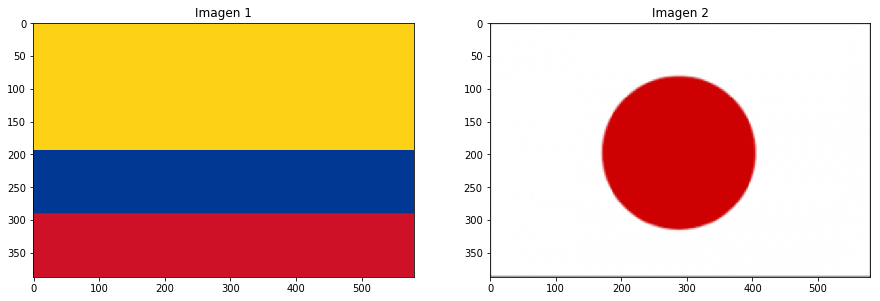

In [4]:
img1 = cv2.cvtColor(cv2.imread('res/col.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('res/jap.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
mostrarDosImagenes(img1,img2)

In [5]:
def transformacionLineal (img1, img2, k):
    return cv2.add(img1*(1-k),img2*k).astype(np.uint8)

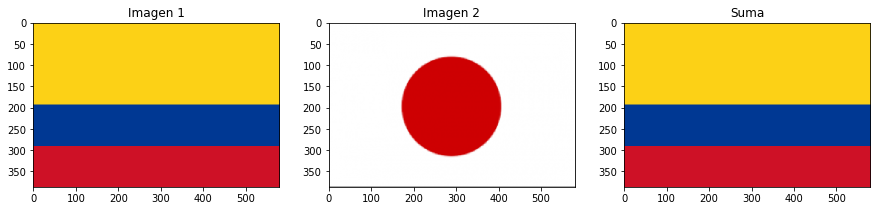

In [6]:
mostrarResultados(img1,img2,transformacionLineal(img1,img2,0))

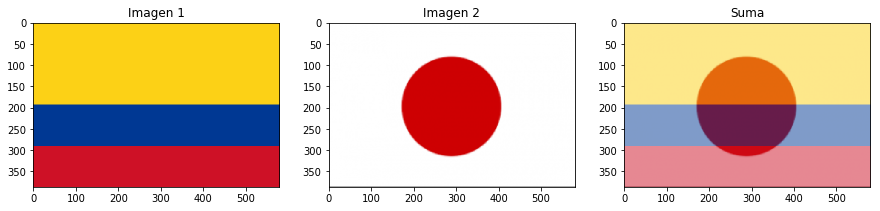

In [7]:
mostrarResultados(img1,img2,transformacionLineal(img1,img2,0.5))

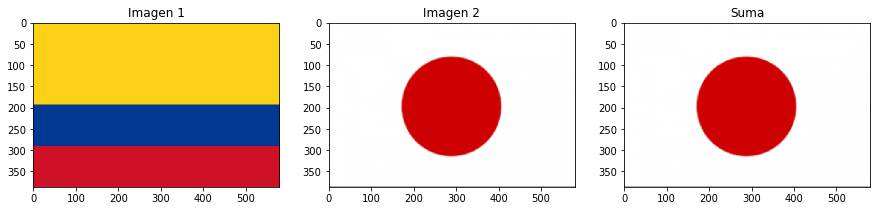

In [8]:
mostrarResultados(img1,img2,transformacionLineal(img1,img2,1))

In [9]:
def transformacionLineal2(img,a,b):
    return cv2.add(cv2.multiply(img,(a,a,a,0)),(b,b,b,0))

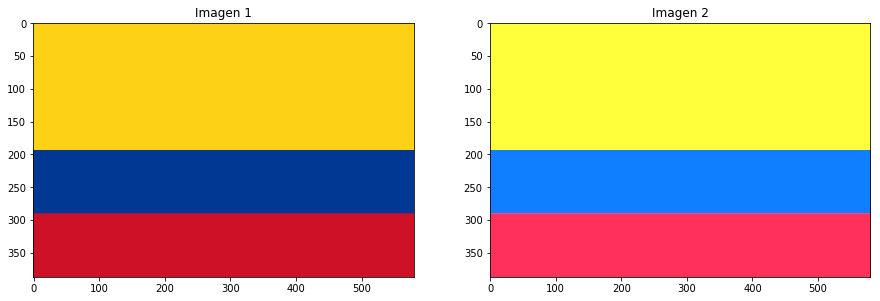

In [10]:
from copy import copy
mostrarDosImagenes(img1, transformacionLineal2(copy(img1),2,15))

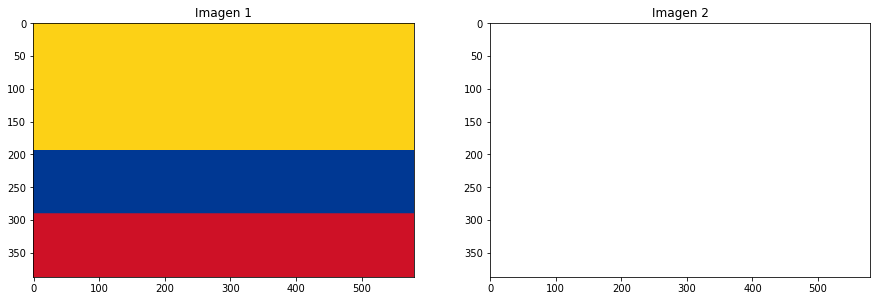

In [11]:
mostrarDosImagenes(img1, transformacionLineal2(img1,1,256))

In [12]:
def obtenerBordes(img):
    bordes = cv2.Canny(img,100,200)
    bordes[bordes<128] = 0   
    bordes = cv2.cvtColor(bordes, cv2.COLOR_GRAY2RGB)
    #Obtener el magenta de los bordes
    bordes[:,:,1]=0               
    return bordes

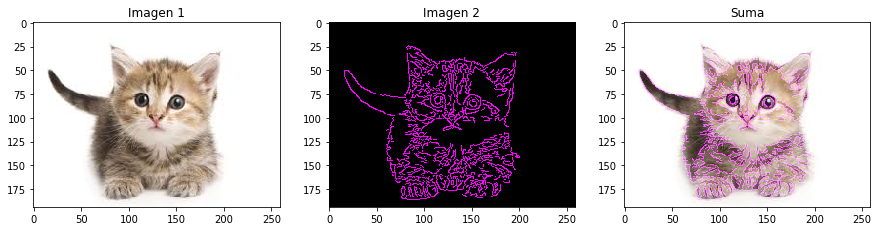

In [13]:
gato = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)
bordes = obtenerBordes(gato)
mostrarResultados(gato,bordes,cv2.add(gato,bordes))

